Tests OpenCv, VTK, ITK et Slicer 3d

In [1]:
# Imports de bibliothèques

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
import dicom
import dicom_numpy
import os
import radiomics
from skimage import io
import SimpleITK as sitk
import collections

In [2]:
# Création du path data
path = "C:/Users/mathi_000/jupyter/Projet/data/"

Création d'un dossier de fichiers dicom

In [ ]:
DOSSIER = []
for dirpath,dirnames,filenames in os.walk(path+"001-026/dcm"):
    for file in filenames:
        DOSSIER.append(os.path.join(dirpath,file))

for d in DOSSIER:
    f = dicom.read_file(d)
    I=f.pixel_array
    plt.figure(figsize=(10,10))
    plt.imshow(I,cmap='gray')
    plt.show()

Construction d'une image 3D grâce à dicom_numpy

In [ ]:
DOSSIER = []
for dirpath,dirnames,filenames in os.walk(path+"001-026/dcm"):
    for file in filenames:
        DOSSIER.append(os.path.join(dirpath,file))

datasets = [dicom.read_file(d) for d in DOSSIER]

voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)

print(np.shape(voxel_ndarray))
print(ijk_to_xyz)

Création du masque (on prend le deuxième masque du premier patient)

In [ ]:
m = io.imread(path+"001-026/l2/kmean.tif")
print(m.shape)
print(m.T.shape)
m = m.T

# # Visualisation du masque
# for z in range(0,324):
#     plt.imshow(m[:,:,z],cmap='gray')
#     plt.show()


In [ ]:
R = radiomics.featureextractor.RadiomicsFeaturesExtractor()
print(R)
R.enableAllFeatures()
print(R.getFeatureClassNames())
R.getFeatureNames('glcm')

# Conversion array ==> simpleITK
image = sitk.GetImageFromArray(voxel_ndarray)
mask = sitk.GetImageFromArray(m)

In [ ]:
F = radiomics.glcm.RadiomicsGLCM(image, mask)
F.getContrastFeatureValue()

Test extraction masque 2.5

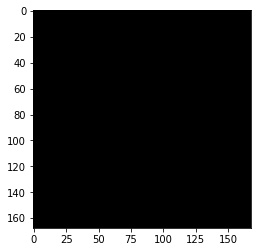

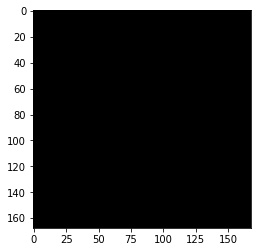

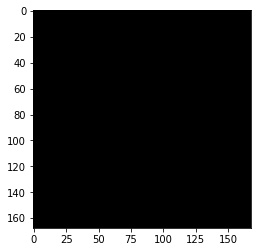

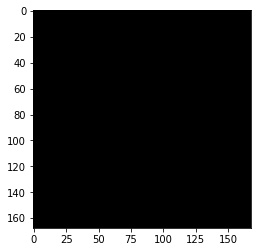

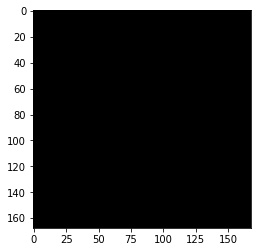

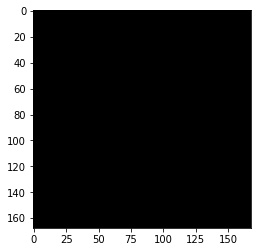

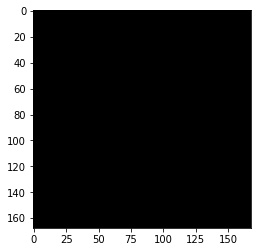

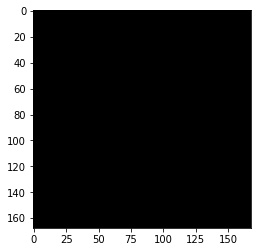

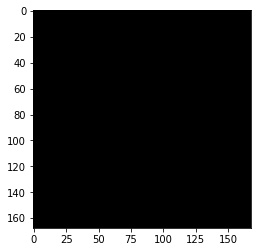

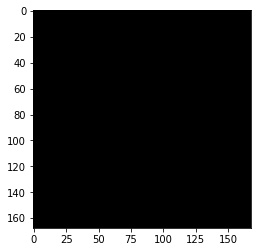

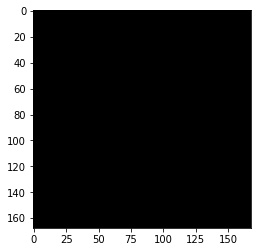

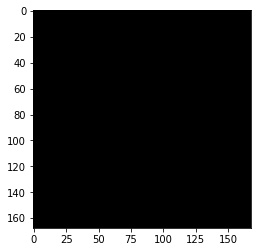

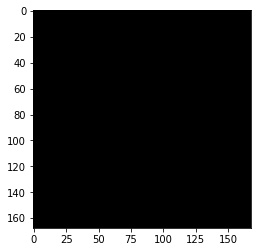

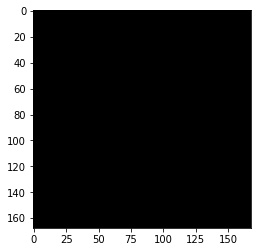

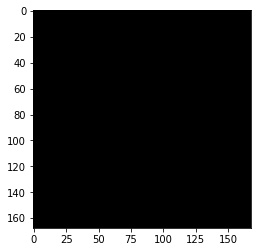

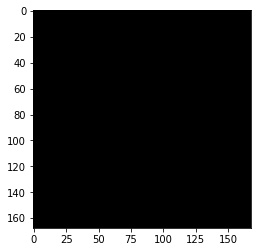

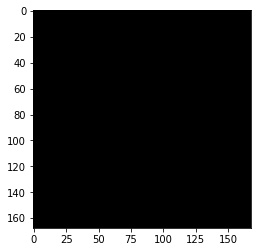

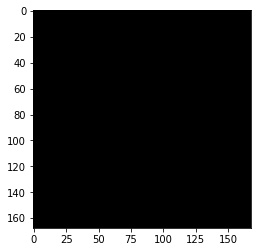

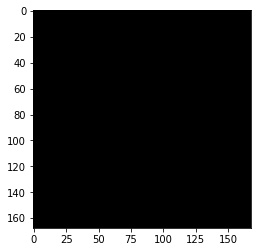

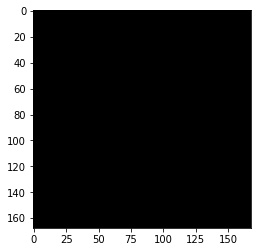

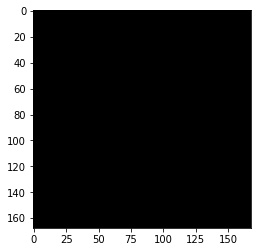

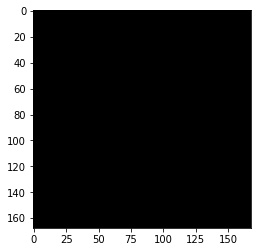

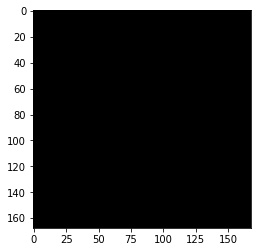

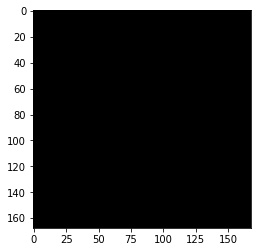

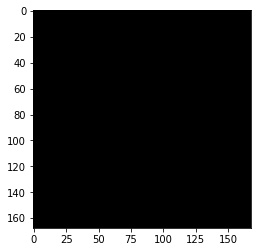

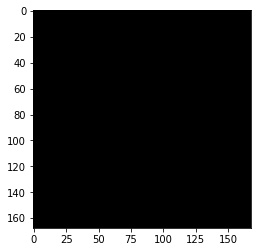

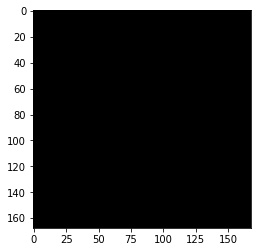

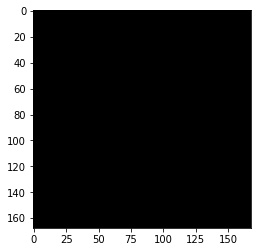

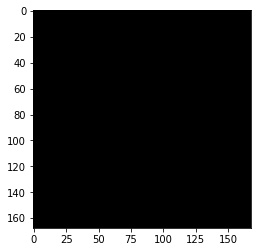

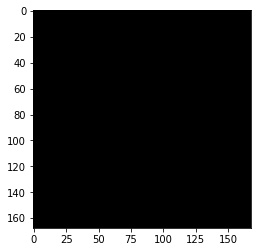

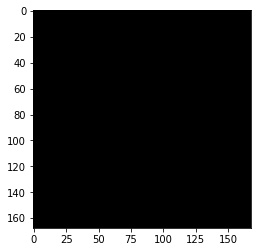

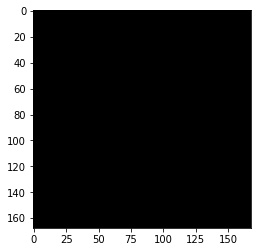

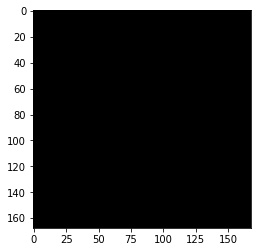

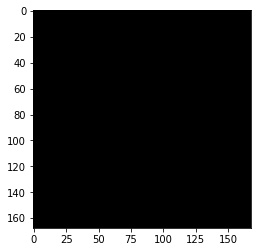

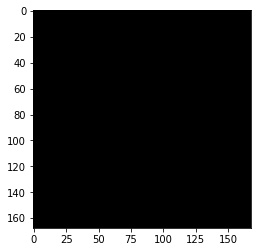

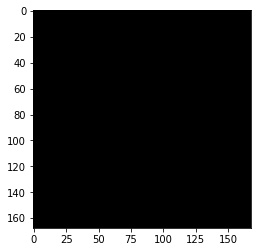

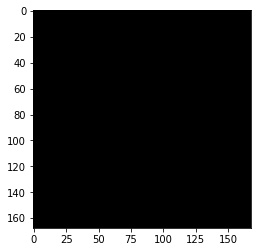

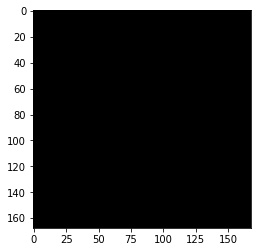

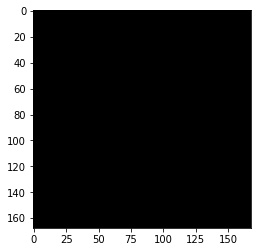

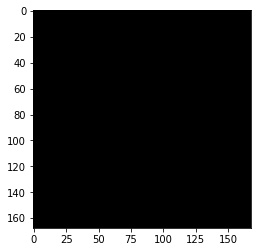

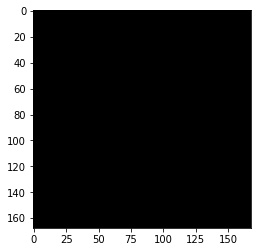

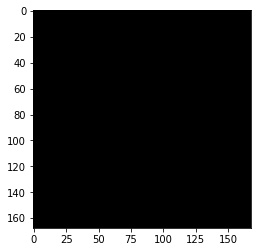

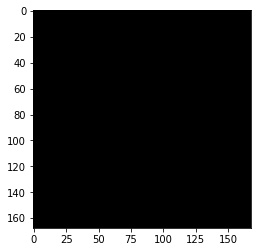

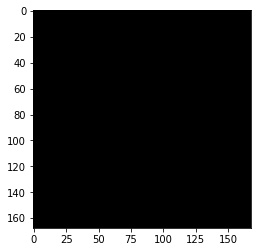

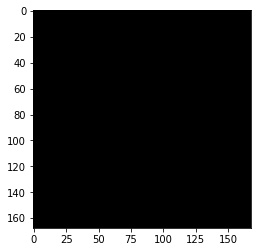

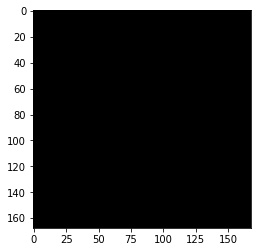

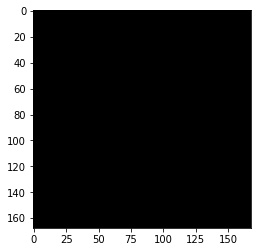

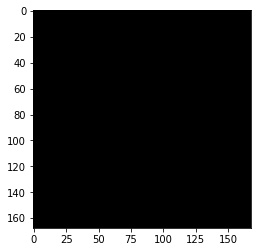

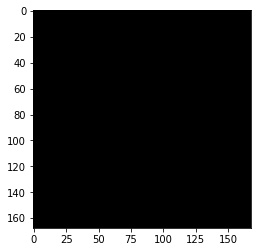

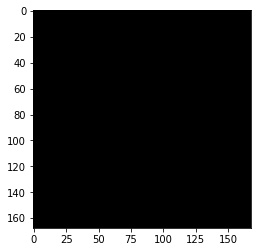

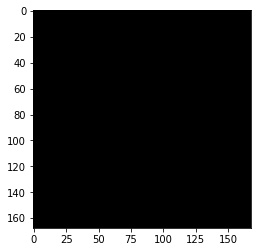

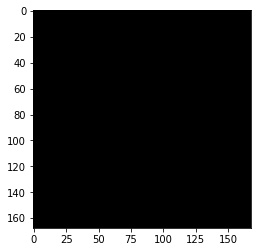

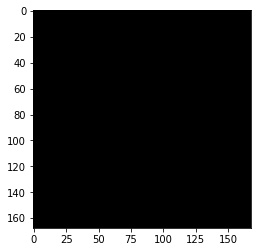

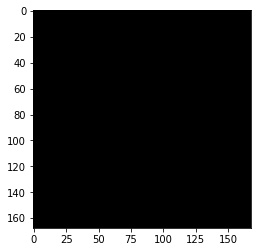

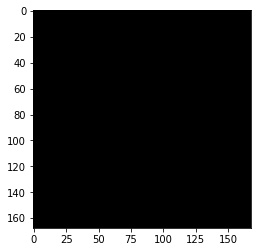

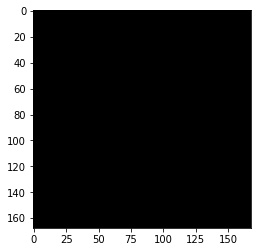

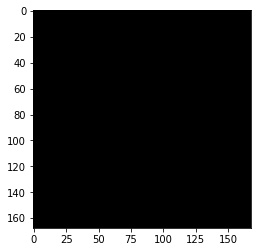

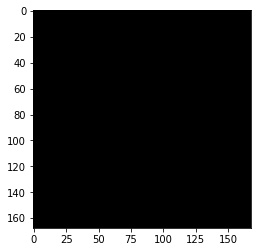

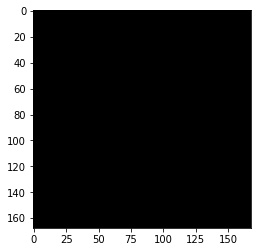

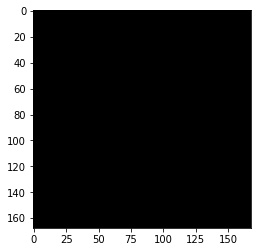

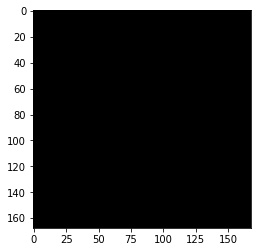

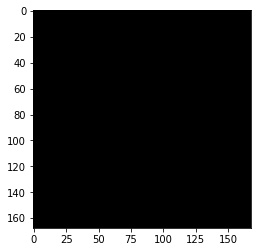

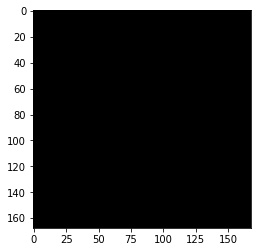

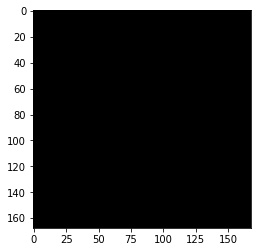

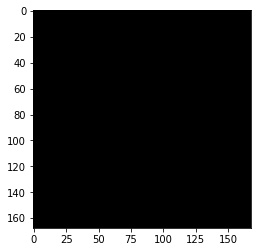

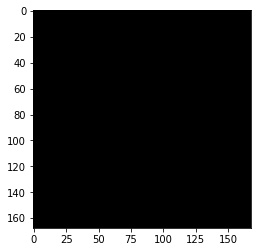

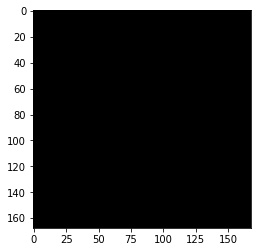

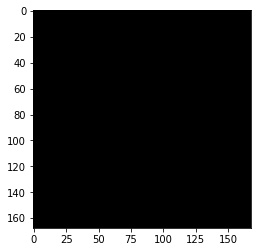

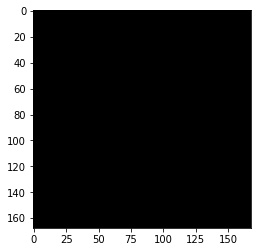

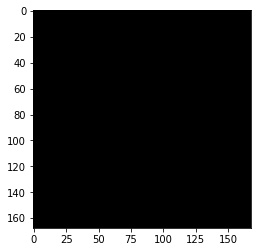

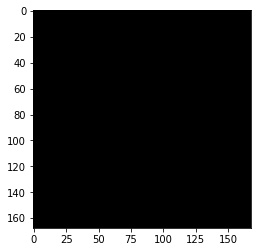

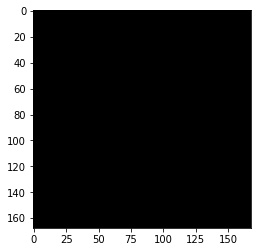

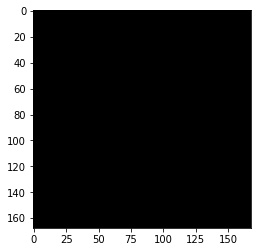

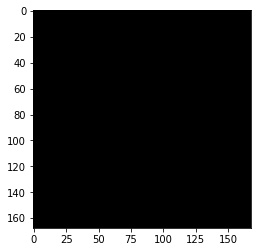

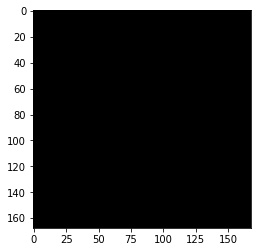

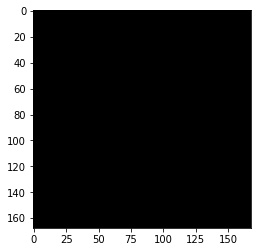

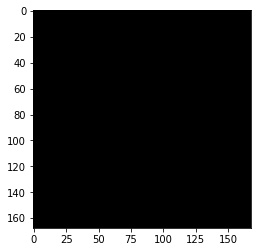

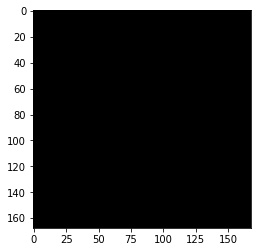

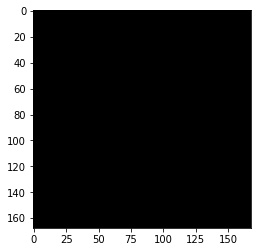

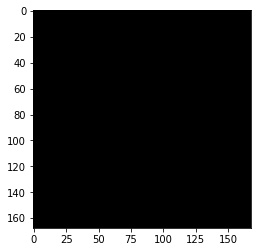

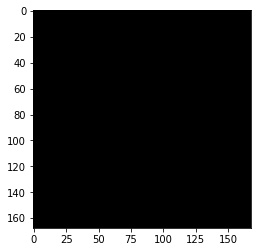

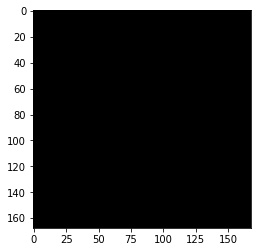

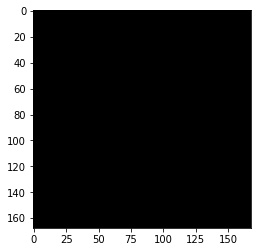

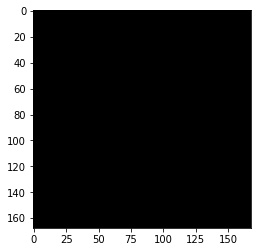

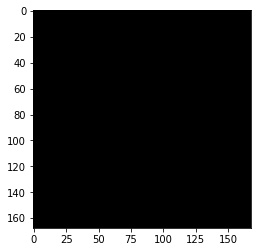

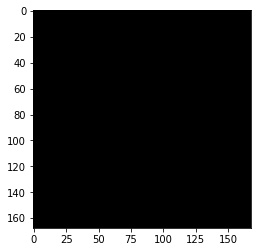

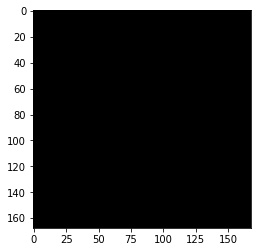

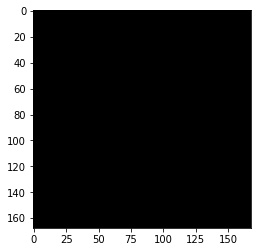

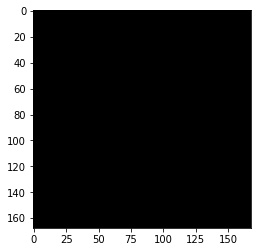

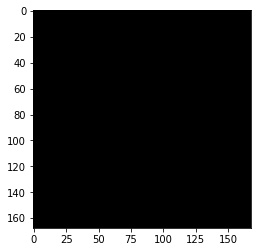

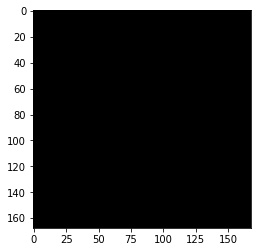

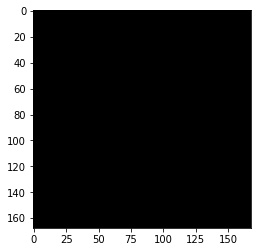

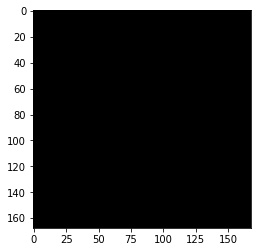

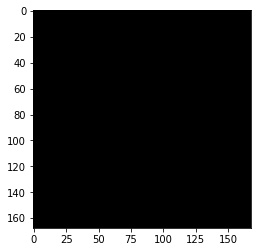

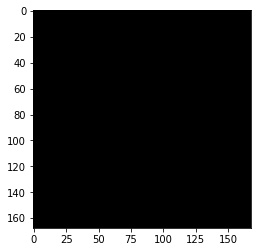

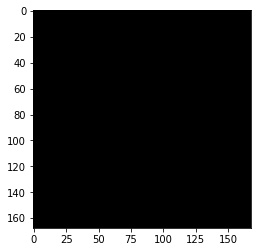

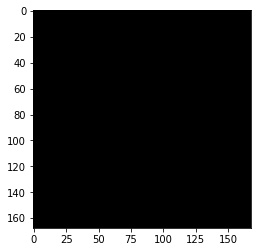

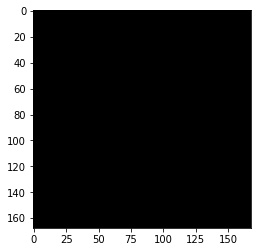

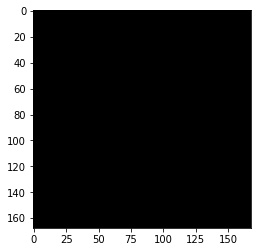

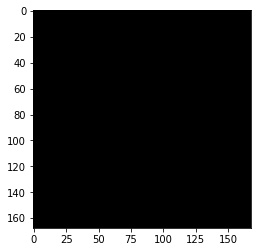

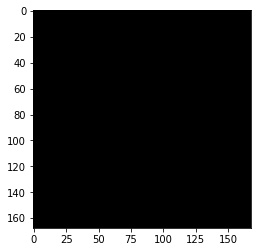

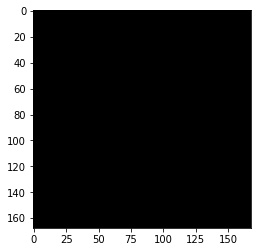

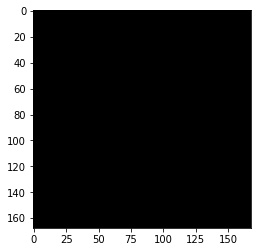

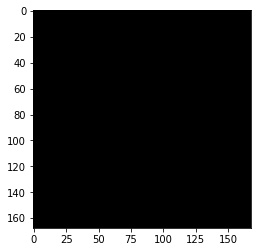

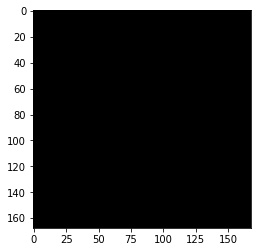

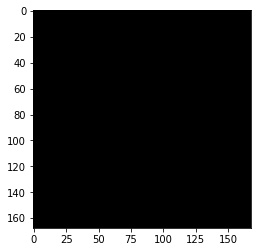

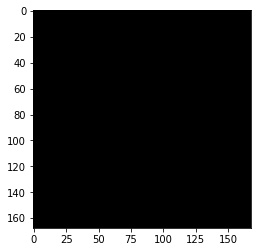

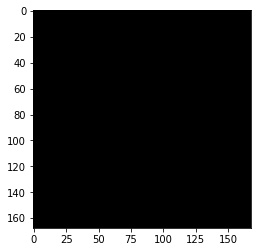

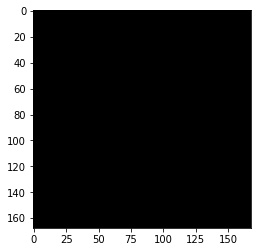

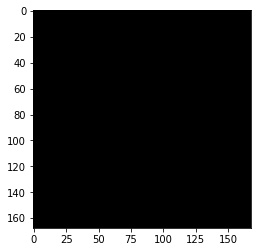

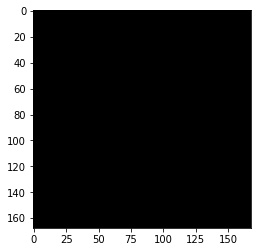

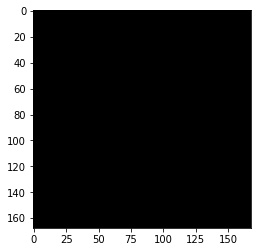

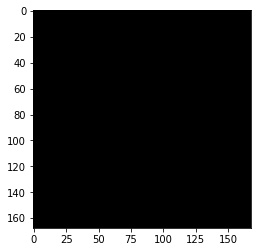

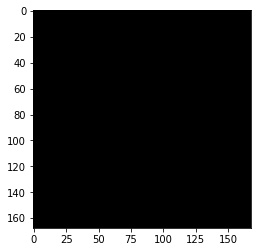

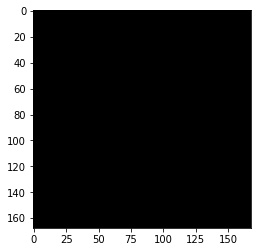

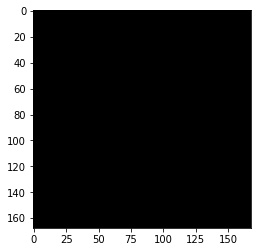

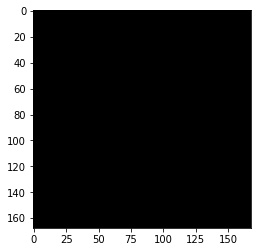

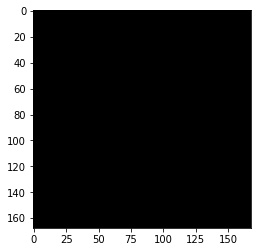

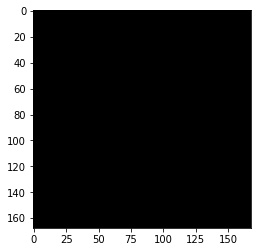

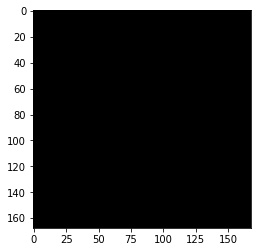

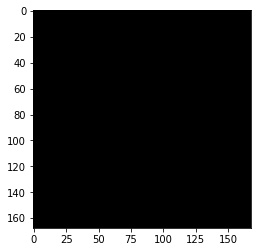

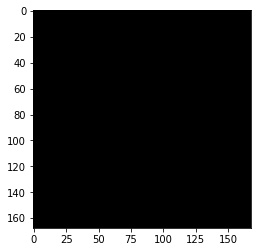

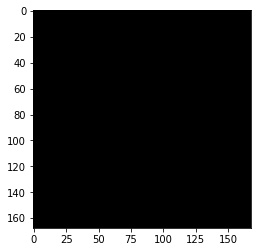

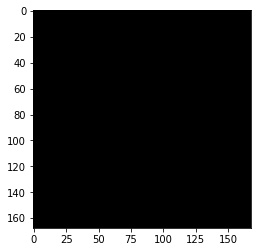

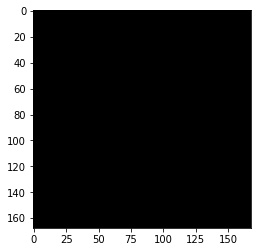

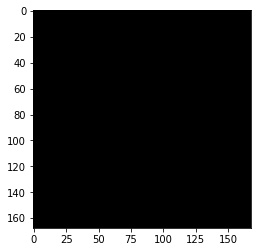

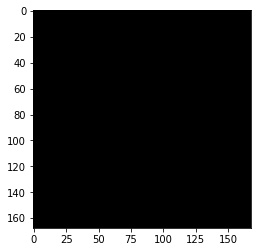

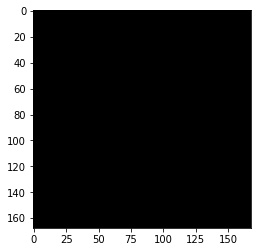

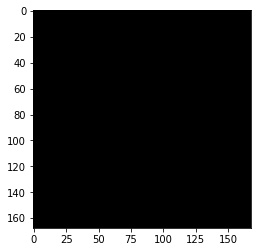

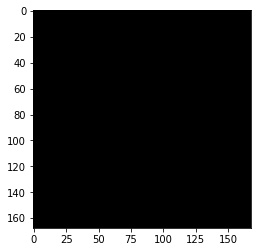

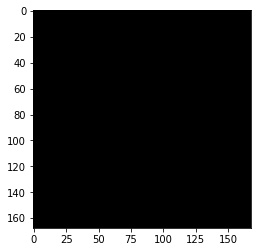

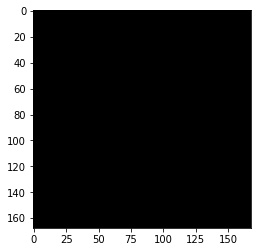

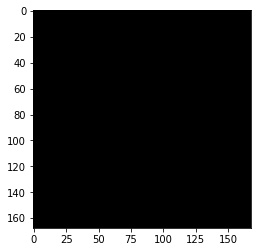

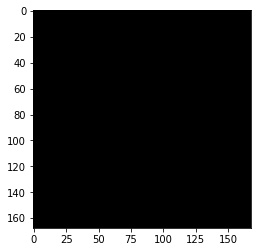

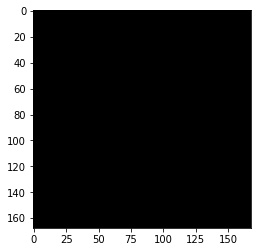

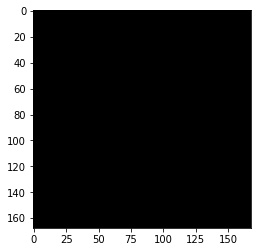

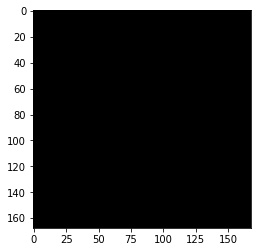

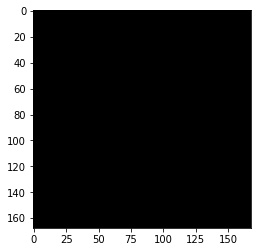

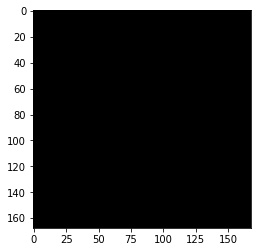

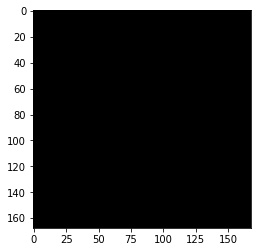

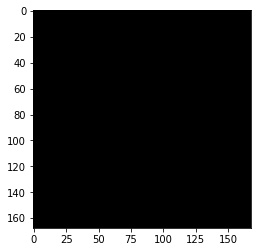

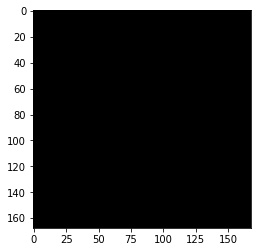

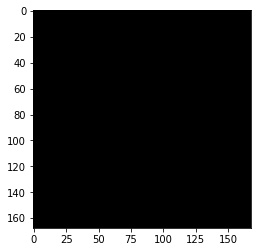

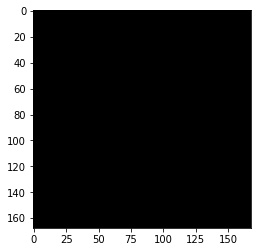

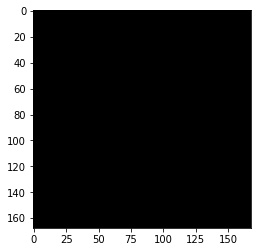

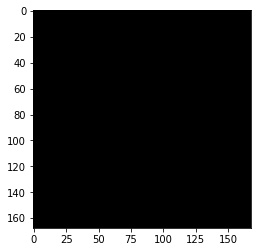

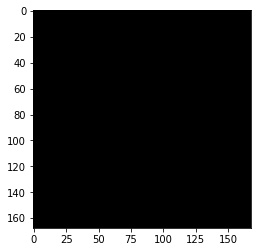

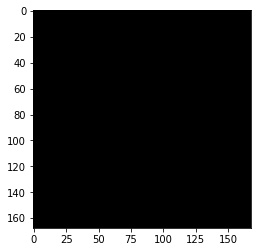

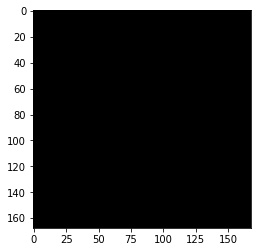

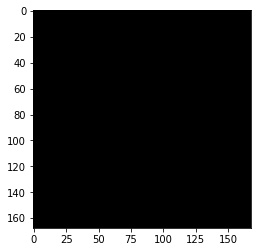

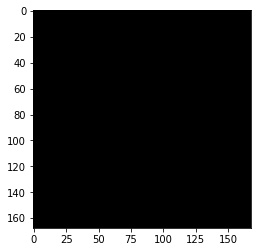

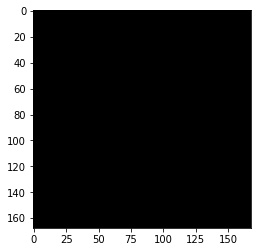

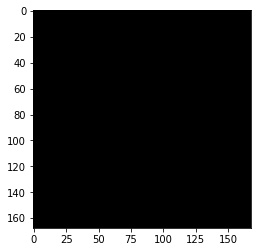

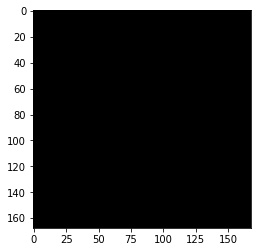

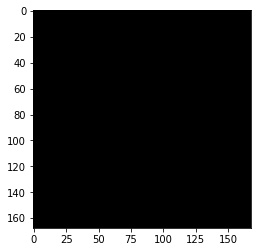

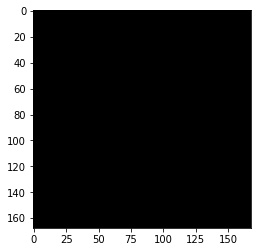

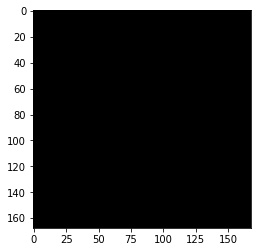

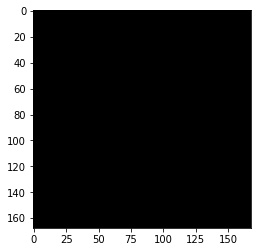

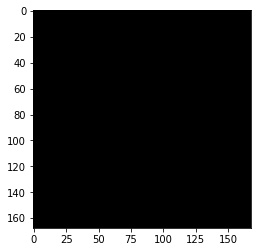

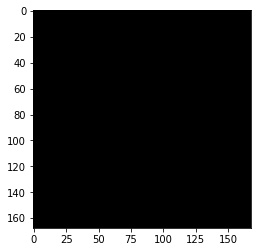

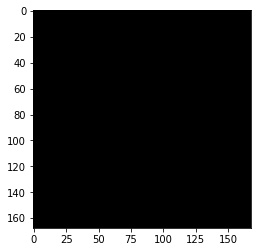

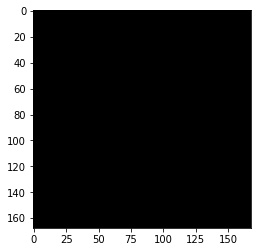

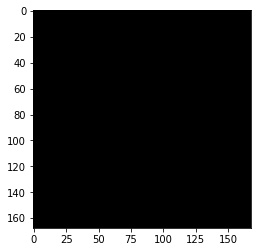

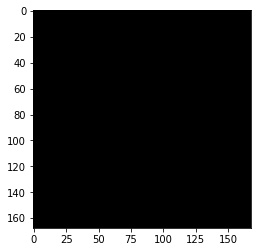

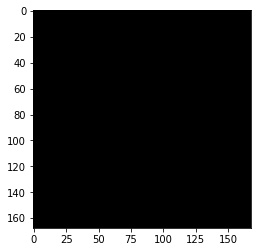

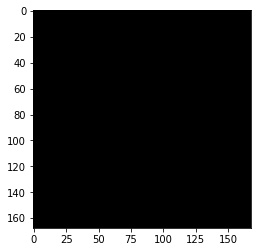

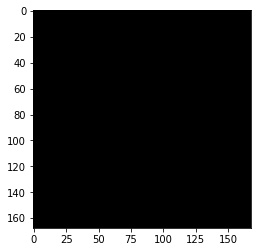

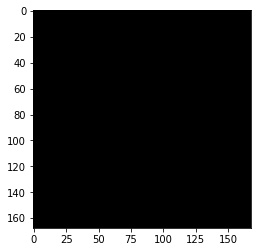

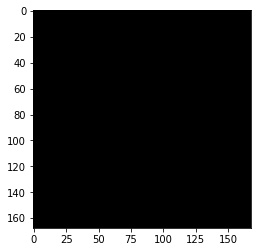

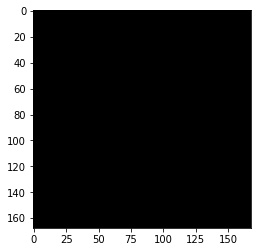

OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO


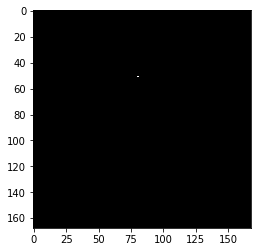

OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO


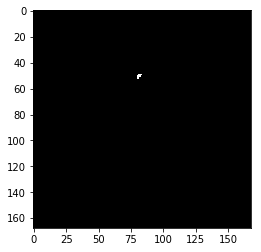

OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO


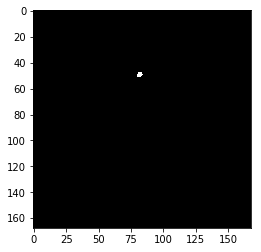

OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOO


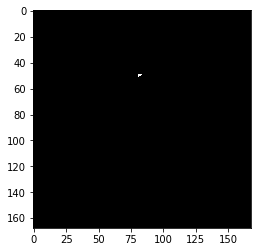

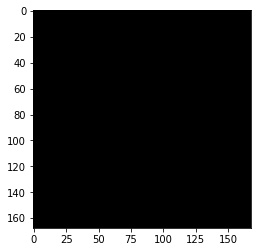

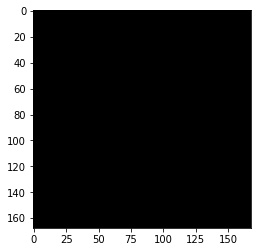

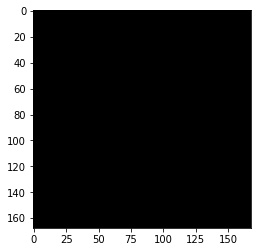

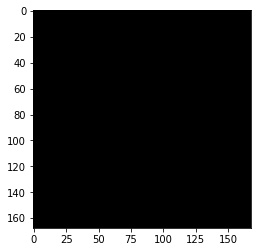

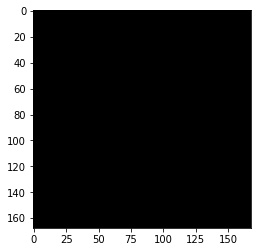

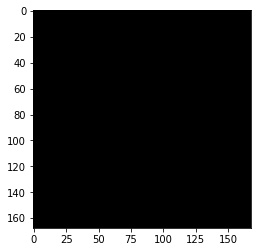

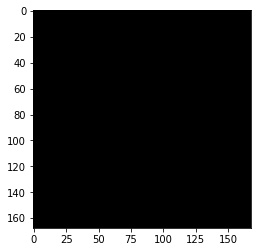

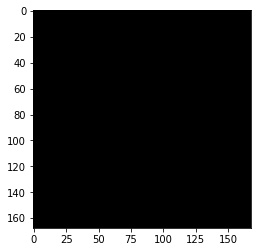

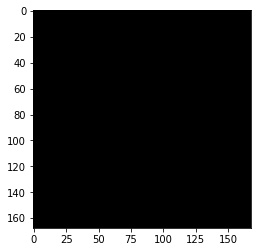

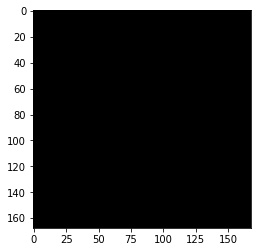

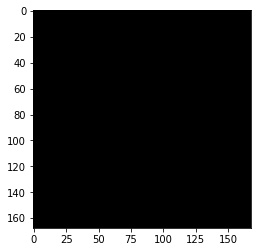

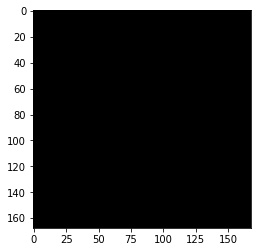

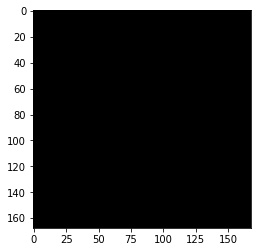

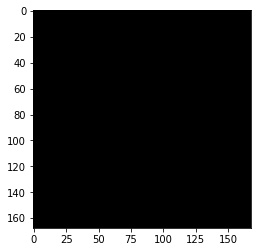

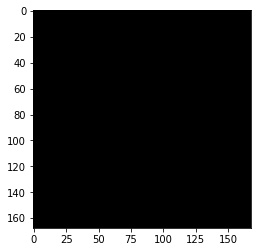

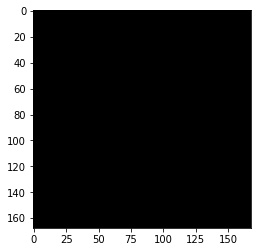

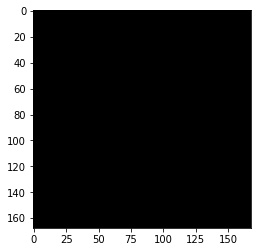

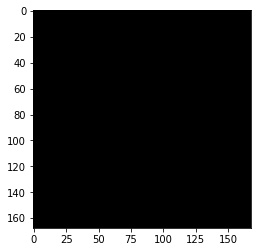

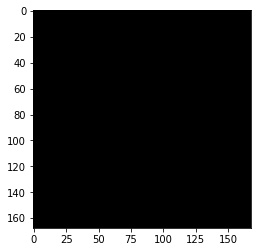

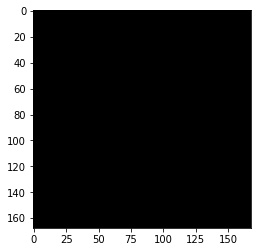

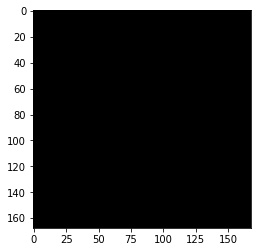

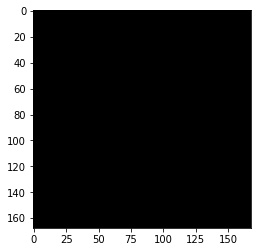

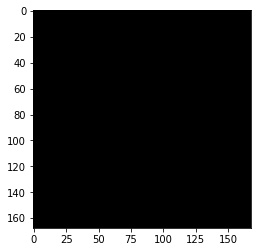

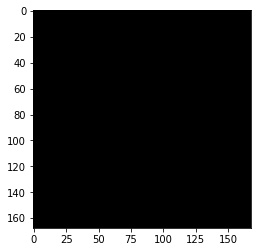

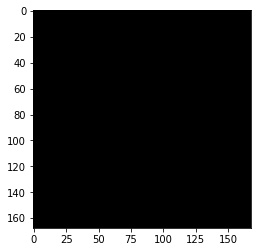

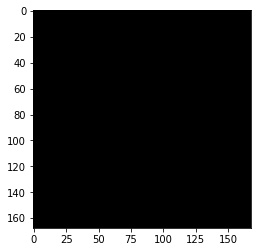

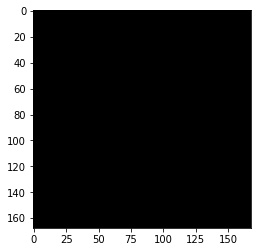

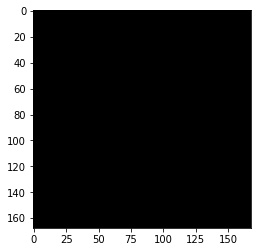

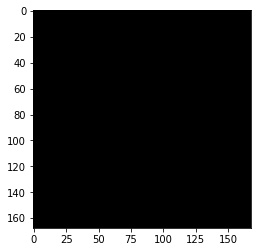

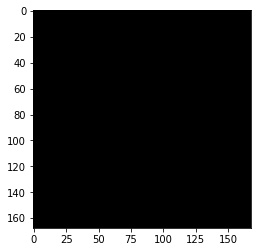

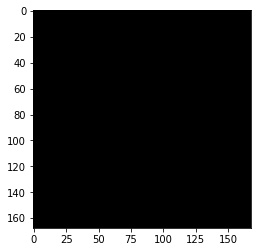

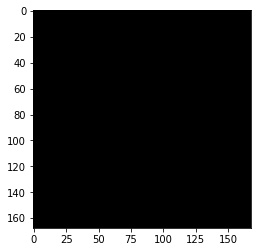

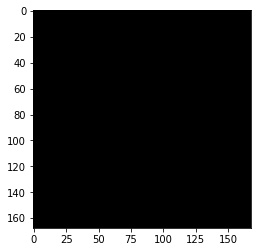

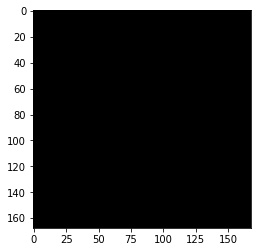

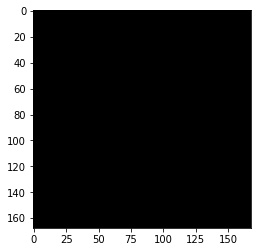

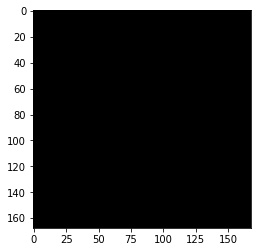

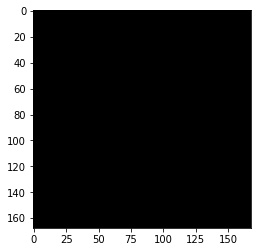

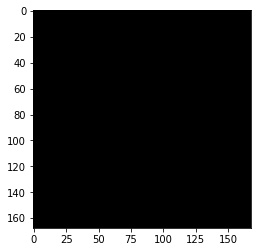

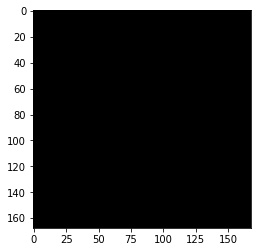

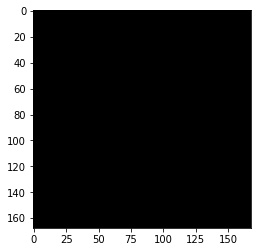

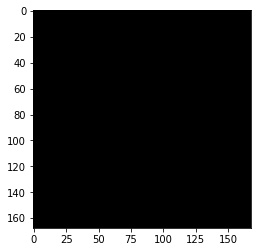

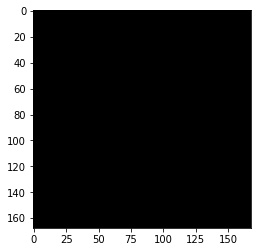

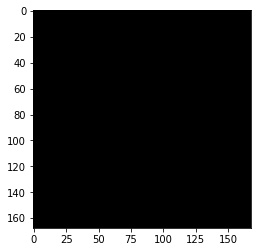

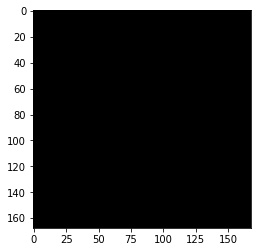

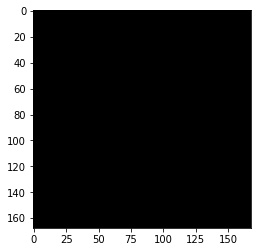

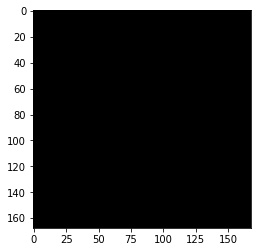

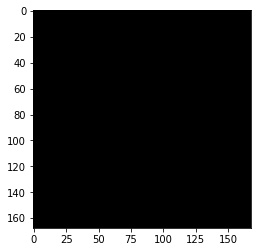

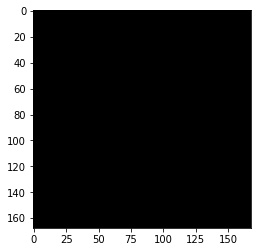

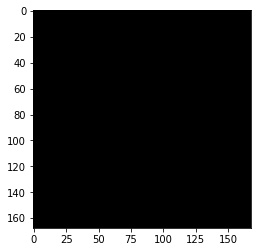

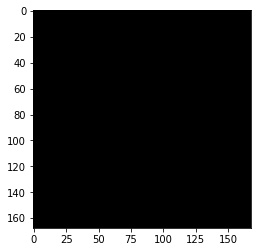

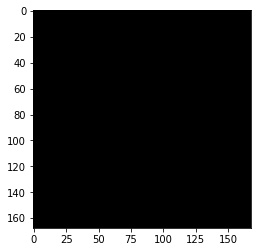

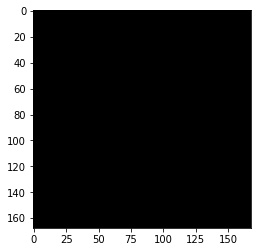

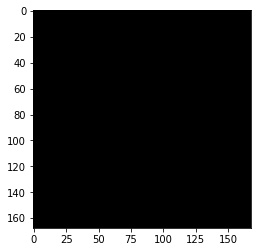

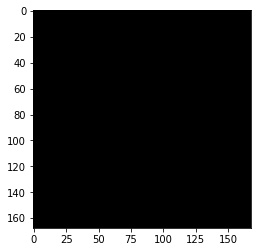

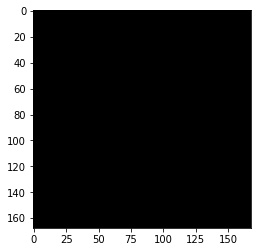

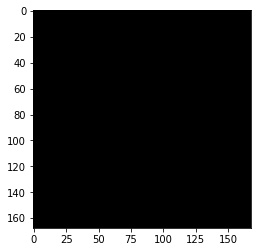

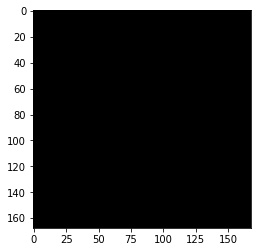

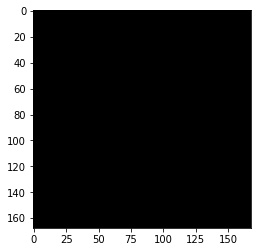

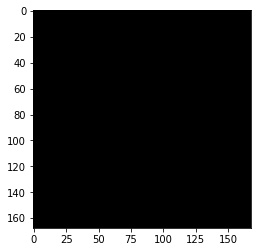

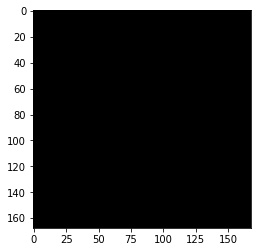

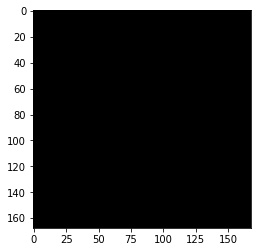

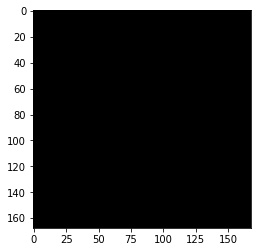

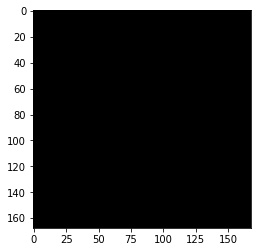

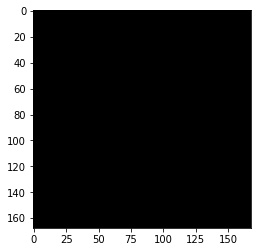

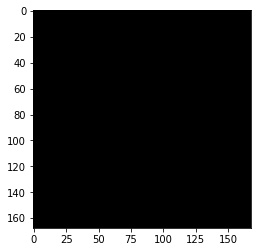

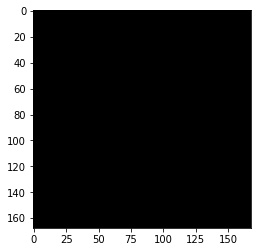

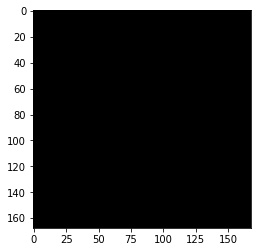

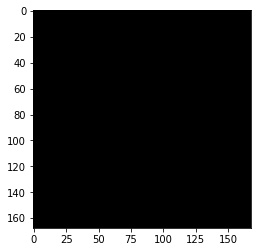

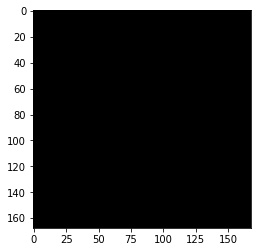

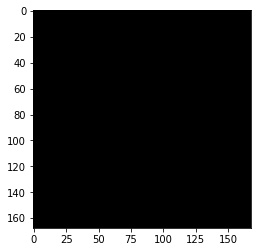

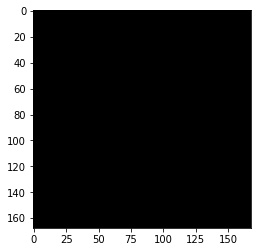

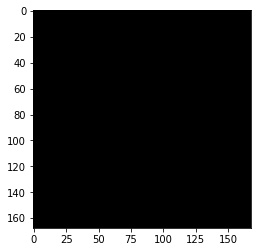

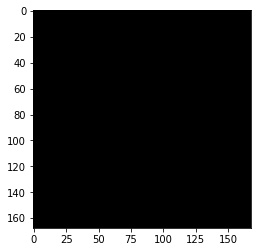

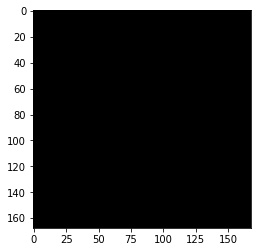

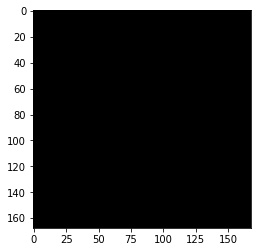

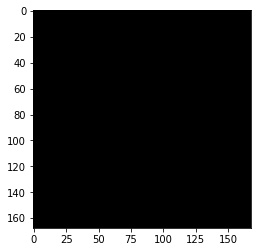

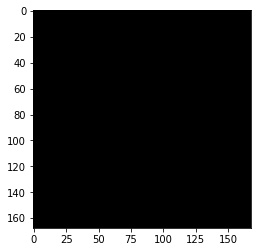

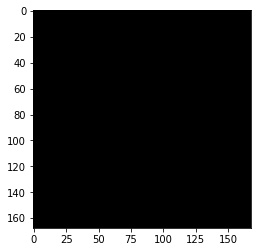

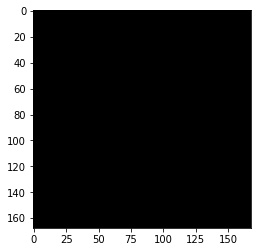

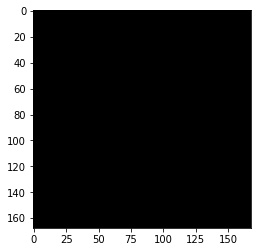

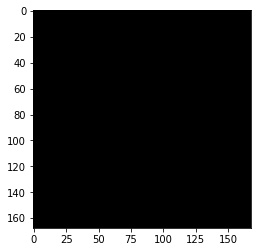

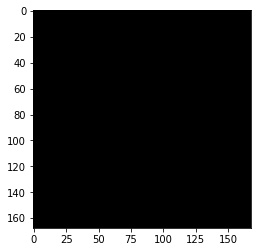

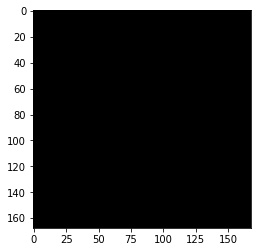

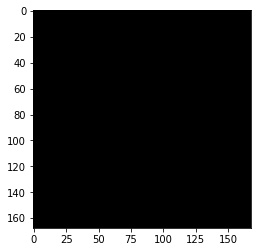

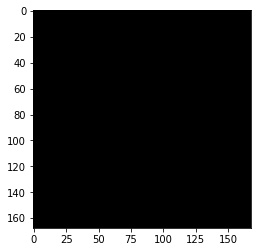

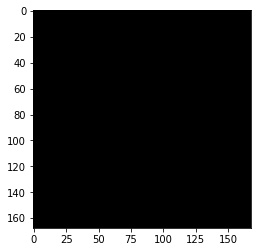

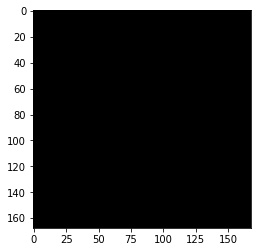

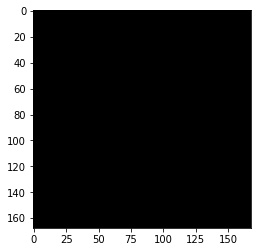

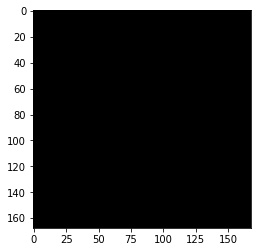

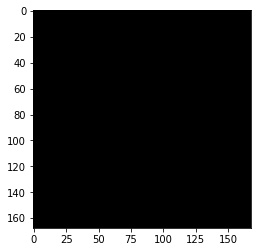

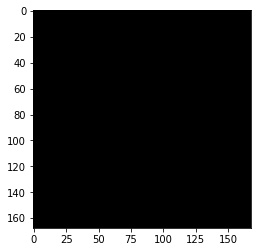

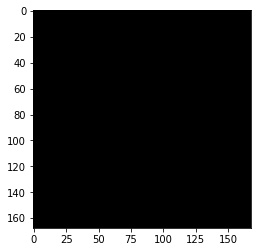

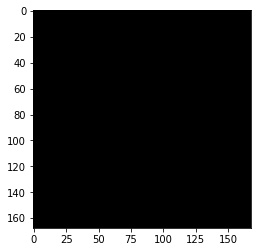

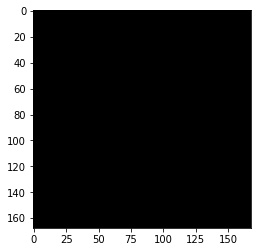

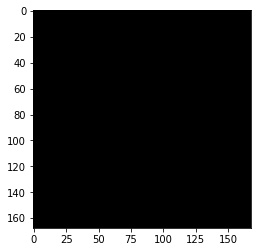

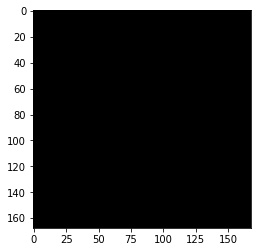

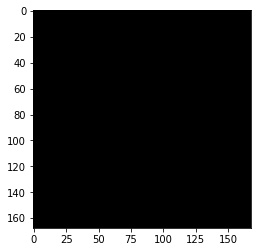

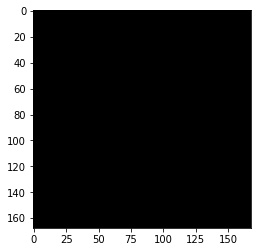

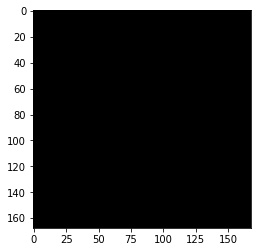

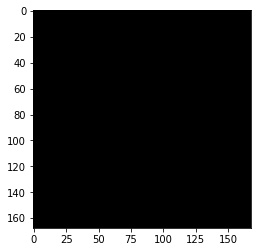

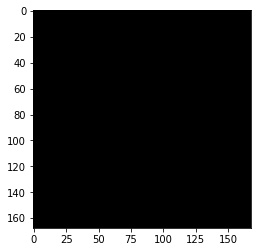

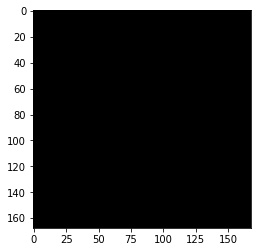

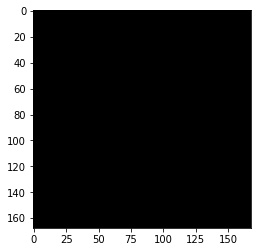

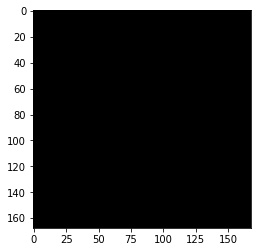

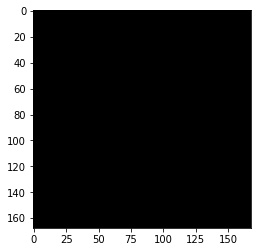

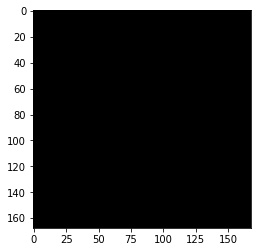

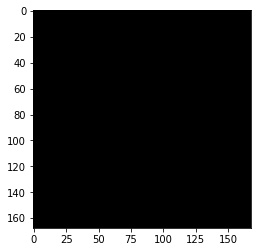

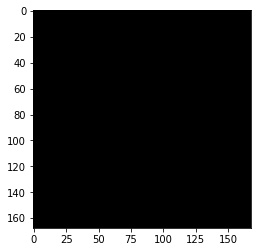

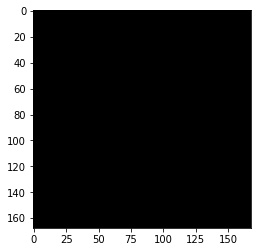

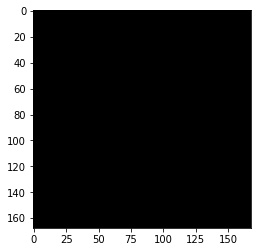

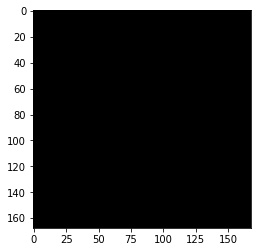

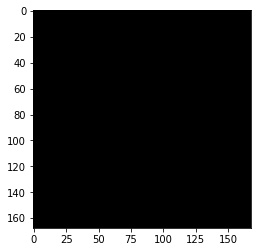

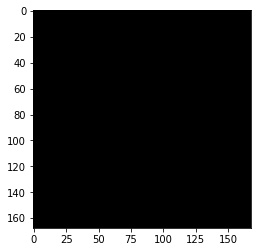

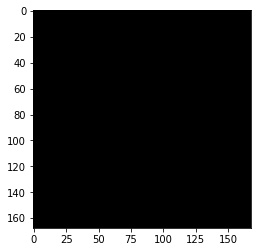

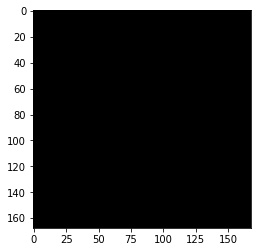

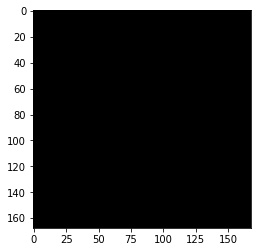

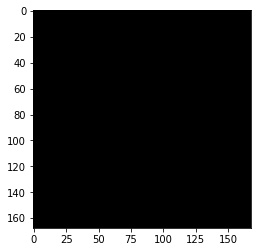

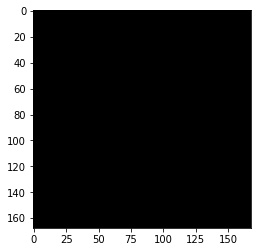

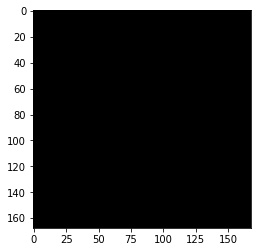

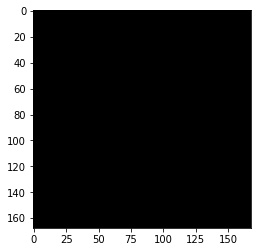

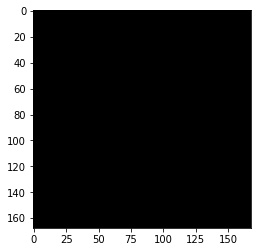

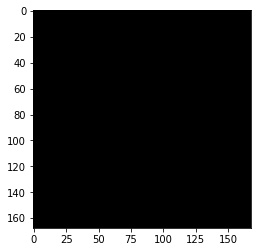

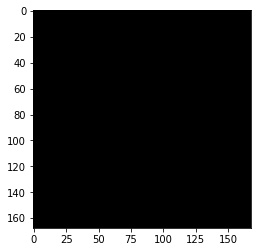

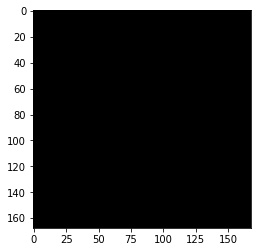

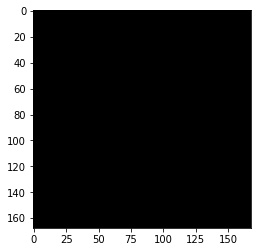

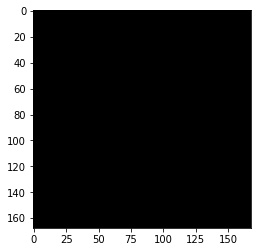

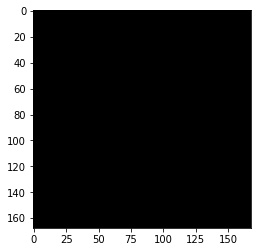

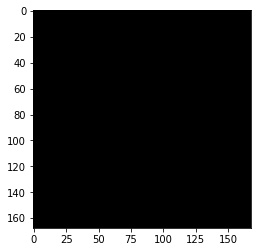

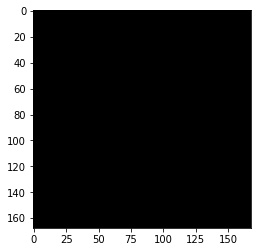

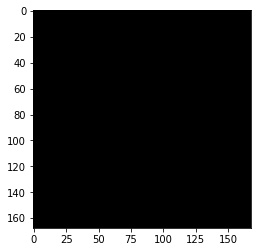

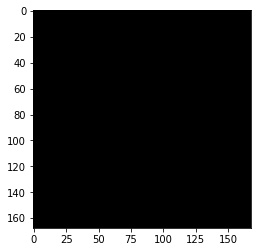

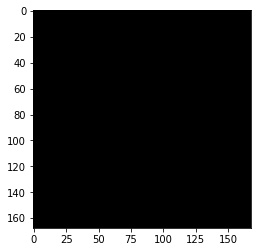

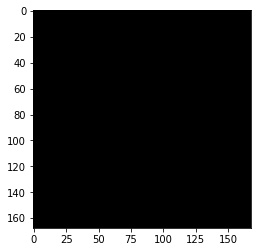

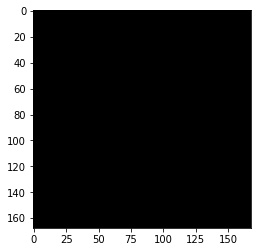

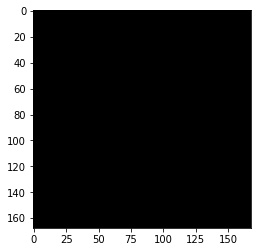

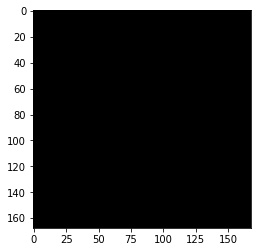

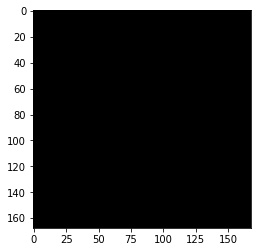

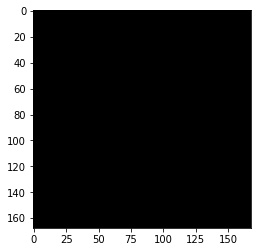

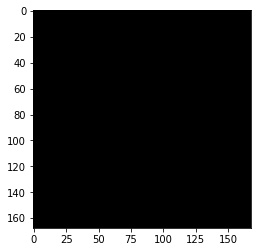

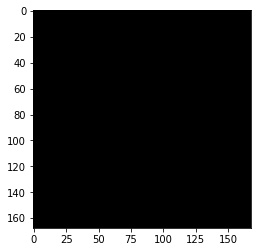

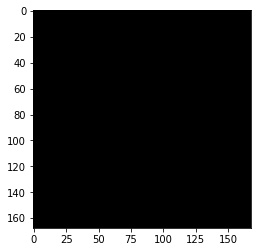

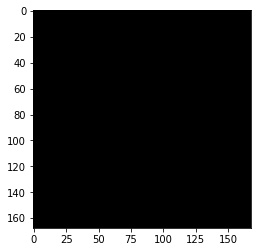

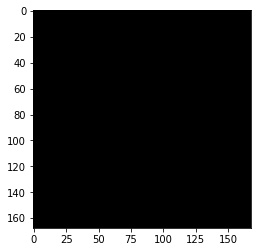

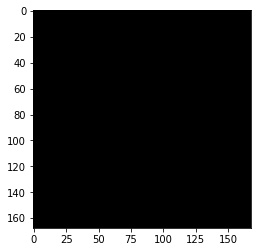

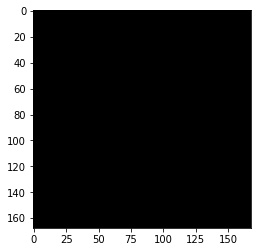

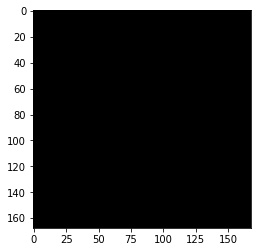

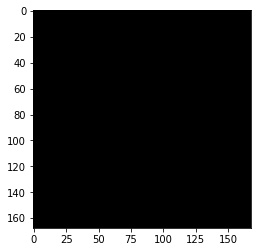

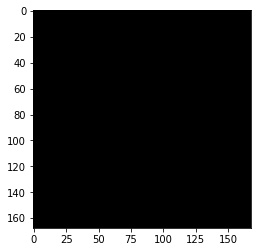

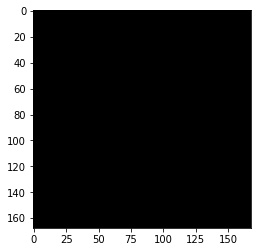

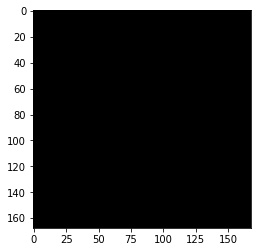

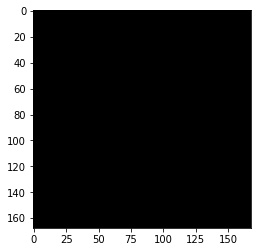

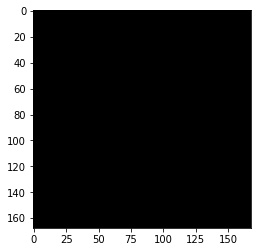

In [3]:
DOSSIER_MASK = []
for dirpath,dirnames,filenames in os.walk(path+"001-026/l1/40"):
    for file in filenames:
        DOSSIER_MASK.append(os.path.join(dirpath,file))
        
#Prendre dimensions des images
DOSSIER = []
for dirpath,dirnames,filenames in os.walk(path+"001-026/dcm"):
    for file in filenames:
        DOSSIER.append(os.path.join(dirpath,file))
f = dicom.read_file(DOSSIER[0])
I=f.pixel_array
s = np.shape(I)

for i in DOSSIER_MASK:
    m = np.zeros(s)
    file = open(i)
    file.readline()
    file.readline()
    file.readline()
    for y in range(s[1]):
        for x in range(s[0]):
            r = file.read(1)
            while (r!='0' and r!='1'):
                r = file.read(1)
            r = float(r)
            if r!=0:
                m[x,s[1]-1-y]=r
    plt.imshow(m, cmap='gray')
    plt.show()